In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import re
import nltk
from nltk.tokenize import word_tokenize
dp=pd.read_csv('nlp-dataset.csv')
text=dp['text']

#Exercise 1
vectors=[]
for i in range(len(text)):
    vectors.append(word_tokenize(text[i]))
print(vectors)



[['In', 'the', 'past', 'John', 'liked', 'only', 'sport', 'but', 'now', 'he', 'likes', 'sport', 'and', 'politics'], ['Sam', 'only', 'liked', 'politics', 'but', 'now', 'he', 'is', 'fan', 'of', 'both', 'music', 'and', 'politics'], ['Sara', 'likes', 'both', 'books', 'and', 'politics', 'but', 'in', 'the', 'past', 'she', 'only', 'read', 'books'], ['Robert', 'loved', 'both', 'books', 'and', 'nature', 'but', 'now', 'he', 'only', 'reads', 'books'], ['Linda', 'liked', 'books', 'and', 'sport', 'but', 'she', 'only', 'likes', 'sport', 'now'], ['Alison', 'used', 'to', 'loved', 'nature', 'but', 'currently', 'she', 'likes', 'both', 'nature', 'and', 'sport']]


In [2]:
#Exercise 2
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()
for i in range(len(vectors)):
        words=[ps.stem(word) for word in vectors[i] if word not in set(stopwords.words('english'))]
        vectors[i]=(words)
print(vectors)

[['in', 'past', 'john', 'like', 'sport', 'like', 'sport', 'polit'], ['sam', 'like', 'polit', 'fan', 'music', 'polit'], ['sara', 'like', 'book', 'polit', 'past', 'read', 'book'], ['robert', 'love', 'book', 'natur', 'read', 'book'], ['linda', 'like', 'book', 'sport', 'like', 'sport'], ['alison', 'use', 'love', 'natur', 'current', 'like', 'natur', 'sport']]


In [6]:
#Exercise 3
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
for i in range(len(vectors)):
    for j in range(len(vectors[i])):
        vectors[i][j]=(lemmatizer.lemmatize(vectors[i][j]))
print(vectors)

[['In', 'the', 'past', 'John', 'liked', 'only', 'sport', 'but', 'now', 'he', 'like', 'sport', 'and', 'politics'], ['Sam', 'only', 'liked', 'politics', 'but', 'now', 'he', 'is', 'fan', 'of', 'both', 'music', 'and', 'politics'], ['Sara', 'like', 'both', 'book', 'and', 'politics', 'but', 'in', 'the', 'past', 'she', 'only', 'read', 'book'], ['Robert', 'loved', 'both', 'book', 'and', 'nature', 'but', 'now', 'he', 'only', 'read', 'book'], ['Linda', 'liked', 'book', 'and', 'sport', 'but', 'she', 'only', 'like', 'sport', 'now'], ['Alison', 'used', 'to', 'loved', 'nature', 'but', 'currently', 'she', 'like', 'both', 'nature', 'and', 'sport']]


In [8]:
#Exercise 4
from sklearn.feature_extraction.text import TfidfVectorizer
from kneed import KneeLocator
import matplotlib.pyplot as plt

corpus=[]
for i in range(len(vectors)):
    sentence=' '.join(vectors[i])
    corpus.append(sentence)
print(corpus)

#TF technique
v = TfidfVectorizer(use_idf=False, norm='l1')
tf = v.fit_transform(corpus)
dp = pd.DataFrame(tf.toarray(), columns=v.get_feature_names())

#dp = pd.DataFrame(tf.toarray(), columns=v.get_feature_names_out())
print(dp)
X=dp.iloc[:,:].values
inertias={}
for i in range(1,7):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(X)
    inertias[i]=kmeans.inertia_
print(inertias)
kneedle = KneeLocator(x=list(inertias.keys()), y=list(inertias.values()), S = 0.1, curve="convex", direction="decreasing")
print("Optimal K-value: ",kneedle.knee)

['In the past John liked only sport but now he like sport and politics', 'Sam only liked politics but now he is fan of both music and politics', 'Sara like both book and politics but in the past she only read book', 'Robert loved both book and nature but now he only read book', 'Linda liked book and sport but she only like sport now', 'Alison used to loved nature but currently she like both nature and sport']
     alison       and      book      both       but  currently       fan  \
0  0.000000  0.071429  0.000000  0.000000  0.071429   0.000000  0.000000   
1  0.000000  0.071429  0.000000  0.071429  0.071429   0.000000  0.071429   
2  0.000000  0.071429  0.142857  0.071429  0.071429   0.000000  0.000000   
3  0.000000  0.083333  0.166667  0.083333  0.083333   0.000000  0.000000   
4  0.000000  0.090909  0.090909  0.000000  0.090909   0.000000  0.000000   
5  0.076923  0.076923  0.000000  0.076923  0.076923   0.076923  0.000000   

         he        in        is  ...  politics      re

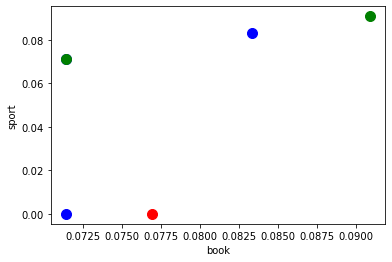

 In the past John liked only sport but now he like sport and politics Sam only liked politics but now he is fan of both music and politics Sara like both book and politics but in the past she only read book Robert loved both book and nature but now he only read book Linda liked book and sport but she only like sport now Alison used to loved nature but currently she like both nature and sport


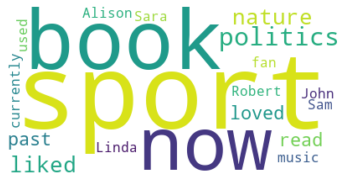

['In the past John liked only sport but now he like sport and politics', 'Sam only liked politics but now he is fan of both music and politics', 'Sara like both book and politics but in the past she only read book', 'Robert loved both book and nature but now he only read book', 'Linda liked book and sport but she only like sport now', 'Alison used to loved nature but currently she like both nature and sport'] 

The top left cluster contains the 1st, 5th, and 6th sentences
The bottom right cluster contains the 3rd and 4th sentences
The bottom left cluster contains the 2nd sentence

Given that the sentences are short and there are few of them, relying on TF technique to identify the feature vectors for the sentences 
that will dicate the cluster a given sentence will belong to appear reliable to identify two or more sentences that indicate similar likes
considering that the listed hobbies in every sentence are all used in the context of past/present likes
Otherwise if there was high vola

In [12]:
#Exercise 5
from wordcloud import WordCloud
X=dp.iloc[:,:].values
kmeans=KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
y_kmeans=kmeans.fit_predict(X)
dp['cluster']=y_kmeans



plt.scatter(X[y_kmeans == 0 , 1], X[y_kmeans == 0 , 17], s = 100, c = 'red', label = 'Group-A')
plt.scatter(X[y_kmeans == 1 , 1], X[y_kmeans == 1 , 17], s = 100, c = 'blue', label = 'Group-B')
plt.scatter(X[y_kmeans == 2 , 1], X[y_kmeans == 2 , 17], s = 100, c = 'green', label = 'Group-C')
plt.scatter(X[y_kmeans == 3 , 1], X[y_kmeans == 3 , 17], s = 100, c = 'yellow', label = 'Group-D')
plt.xlabel("book")
plt.ylabel("sport")
plt.show()

# Display the overall frequency of each feature using word clouds Cloud
text=""
for sentence in corpus:
    text=text + " " + sentence
print(text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print(corpus,"\n")

print("The top left cluster contains the 1st, 5th, and 6th sentences")
print("The bottom right cluster contains the 3rd and 4th sentences")
print("The bottom left cluster contains the 2nd sentence")

print("\nGiven that the sentences are short and there are few of them, relying on TF technique to identify the feature vectors for the sentences ")
print("that will dicate the cluster a given sentence will belong to appear reliable to identify two or more sentences that indicate similar likes")
print("considering that the listed hobbies in every sentence are all used in the context of past/present likes")
print("Otherwise if there was high volatility in the context that some of these words were used in from sentence to sentence")
print("then a technique like word to vector that constructs feature vectors upon the context important words are used would be very important")